# Test File - Pushing to Git

Git use is successful - set up and saving ok.

# Aims for this notebook:
- Import data from the scan feature in ImageJ
- Plot data (normalise) and fit to Gaussians to find waist values 
- Plot all waist values against z distance to extropolate back and find w0

## Import all useful libraries / tools

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from os import listdir

## Import Data

Function below that takes path and returns distances and amplitudes from all csv files in that folder, as np.ndarrays in a big list

In [55]:
def import_data(global_path):

    # Function which finds filenames of csvs in a folder
    def find_csv_filenames( path_to_dir, suffix=".csv" ):
        filenames = listdir(path_to_dir)
        return [ filename for filename in filenames if filename.endswith( suffix ) ]

    # the list of files in the folder
    files_list = find_csv_filenames(global_path)

    # empty lists to put values in
    distances = []
    amps = []

    # loop through file names in directory
    for f in range(len(files_list)):

        # Import an execl sheet as dataframe, called 'Values1'
        # NB: Image J seems to have saved this 'excel sheet' as a csv file
        df_test = pd.read_csv(global_path + files_list[f])

        # Extracing a column by title and converting data to array
        distances.append(np.array(df_test['Distance_(microns)']))
        amps.append(np.array(df_test['Gray_Value']))

    # returning arrays within two big lists
    return distances, amps

In [56]:
# Define useful path to data
globalpath = "D:/1. L4 Project/Fibres/2023-11-28/Data-Photo2/"

In [57]:
distances, amplitudes = import_data(globalpath)

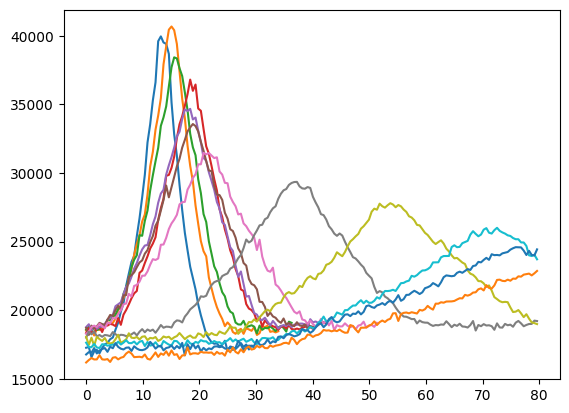

In [58]:
for i in range(12):
    plt.plot(distances[i][0:170], amplitudes[i][0:170])

plt.show()